In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

In [3]:
model.compile(optimizer=RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, 
                    batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 98ms/step - loss: 0.7129 - acc: 0.5323 - val_loss: 0.6854 - val_acc: 0.5454
Epoch 2/10
157/157 [==============================] - 15s 94ms/step - loss: 0.6634 - acc: 0.6758 - val_loss: 0.6627 - val_acc: 0.6604
Epoch 3/10
157/157 [==============================] - 15s 96ms/step - loss: 0.6208 - acc: 0.7600 - val_loss: 0.6099 - val_acc: 0.7406
Epoch 4/10
157/157 [==============================] - 15s 93ms/step - loss: 0.5308 - acc: 0.8110 - val_loss: 0.4913 - val_acc: 0.8042
Epoch 5/10
157/157 [==============================] - 15s 94ms/step - loss: 0.4109 - acc: 0.8453 - val_loss: 0.4293 - val_acc: 0.8312
Epoch 6/10
157/157 [==============================] - 15s 95ms/step - loss: 0.3450 - acc: 0.8736 - val_loss: 0.4239 - val_acc: 0.8412
Epoch 7/10
157/157 [==============================] - 16s 99ms/step - loss: 0.3022 - acc: 0.8919 - val_loss: 0.4255 - val_acc: 0.8524
Epoch 8/10
157/157 [==============================] - 15s 93ms

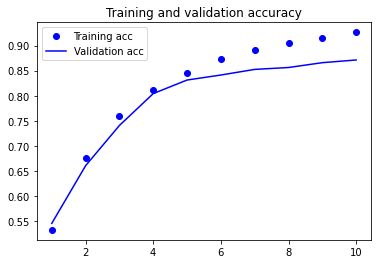

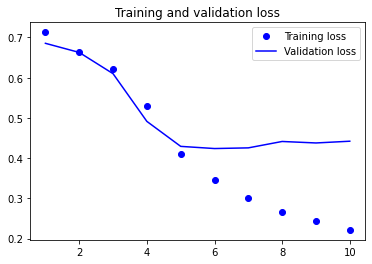

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()